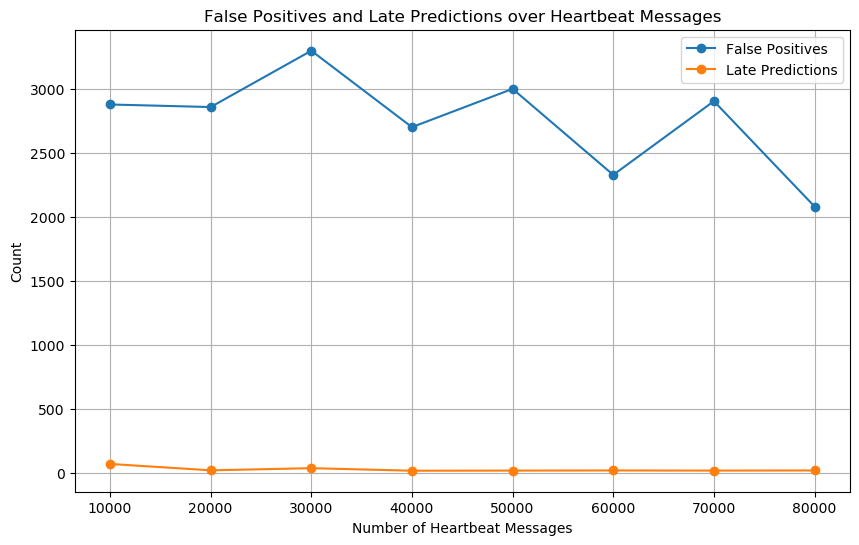

In [1]:
import matplotlib.pyplot as plt

# Data
data = {
    "false_positives": [2879, 2859, 3299, 2702, 3001, 2329, 2905, 2082],
    "late_predictions": [71, 21, 38, 18, 19, 20, 19, 20]
}

# Number of Heartbeat Messages (x-axis)
heartbeat_messages = [10000 * i for i in range(1, len(data["false_positives"]) + 1)]

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(heartbeat_messages, data["false_positives"], marker='o', label='False Positives')
plt.plot(heartbeat_messages, data["late_predictions"], marker='o', label='Late Predictions')
plt.xlabel('Number of Heartbeat Messages')
plt.ylabel('Count')
plt.title('False Positives and Late Predictions over Heartbeat Messages')
plt.legend()
plt.grid(True)
plt.show()


Clock Cycles (Scaled): [68.140304, 67.006345, 68.750059, 67.365446, 66.485405, 63.612095, 66.69193, 65.868731, 76.280241, 69.308716, 68.534466, 67.814735, 69.506488, 68.83878, 70.231289, 70.526526, 70.028913, 70.659407, 70.856807, 70.502157, 71.916419, 69.526601, 69.562067, 67.717551, 68.60177, 67.552119, 71.108513, 70.42574, 69.933164, 67.138639, 68.966677, 68.479802, 69.447879, 70.012064, 72.828658, 68.735533, 69.278585, 66.597158, 67.460525, 68.040629, 65.852915, 68.712792, 70.790487, 67.411584, 70.075875, 67.356883, 69.438343, 69.920827, 66.752569, 68.287583, 69.80106, 70.145196, 69.263771, 66.695643, 70.332116, 68.916859, 69.336314, 69.618326, 70.260015, 71.274829, 68.88295, 70.12208, 70.000206, 72.711619, 69.994263, 69.854661, 71.344265, 70.123119, 71.466369, 69.464496, 70.213052, 69.827722, 69.933722, 70.092146, 70.515839, 69.972693, 68.064123, 70.325577, 68.881429, 68.113286, 77.353007, 69.51606, 71.769623, 69.242033, 70.536245, 69.189372, 70.096497, 67.73511, 67.340861, 68.566

Average of clock cycles: 69.92487949896918 ms
Standard deviation of clock cycles: 7.102664293448351 ms


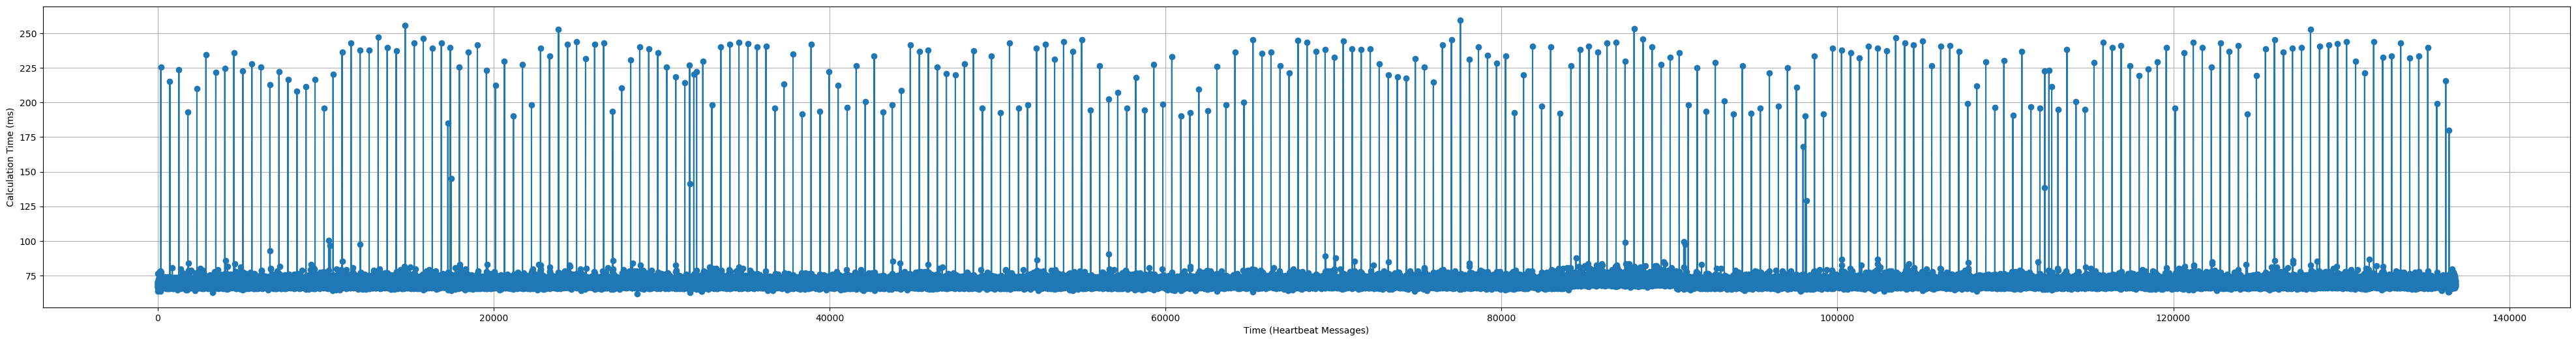

259.464782


In [2]:
import matplotlib.pyplot as plt
import statistics

# Function to process data between the first and second "*******************New Run*******************" markers
def process_data_between_markers(lines):
    data = {"time": [], "clock_cycles": []}
    marker_count = 0

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 2:
                break
        elif marker_count == 1:
            try:
                clock_cycles = int(line.strip())
                data["clock_cycles"].append(clock_cycles / 2000000)
            except ValueError:
                pass

    # Calculate the time values based on the number of heartbeat messages (assuming 1 heartbeat message per data point)
    data["time"] = list(range(1, len(data["clock_cycles"]) + 1))
    return data

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(50, 6))
    plt.plot(data["time"], data["clock_cycles"], marker='o')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Calculation Time (ms)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    file_path = "computation_time.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data = process_data_between_markers(lines)
    print("Clock Cycles (Scaled):", data["clock_cycles"])
    print("Time (Heartbeat Messages):", data["time"])
        
    # Count and remove clock cycles above 300
    if data["clock_cycles"]:
        count_above_300 = sum(1 for cycle in data["clock_cycles"] if cycle > 300)
        data["clock_cycles"] = [cycle for cycle in data["clock_cycles"] if cycle <= 300]
    if data["time"]:
        for i in range(count_above_300):
            data["time"].pop()
            
    # Calculate the average and standard deviation of clock cycles
    if data["clock_cycles"]:
        average_cycles = statistics.mean(data["clock_cycles"])
        std_dev_cycles = statistics.stdev(data["clock_cycles"])

    print("Average of clock cycles:", average_cycles, "ms")
    print("Standard deviation of clock cycles:", std_dev_cycles, "ms")
    
    
    plot_line_chart(data)
    print(max(data["clock_cycles"]))


Processed Data: {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000], 'false_positives': [360, 294, 377, 404, 410, 456, 445, 408, 386, 394, 412, 330, 451, 441, 439, 429]}


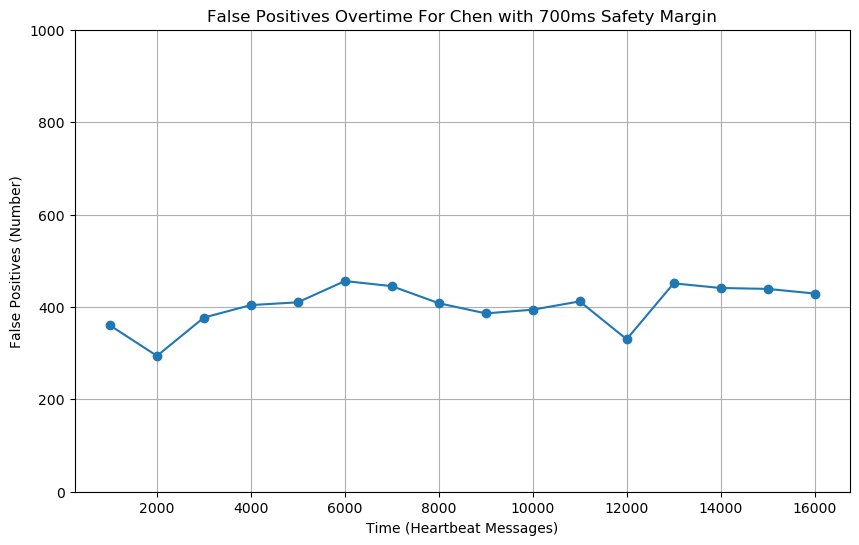

In [3]:
import matplotlib.pyplot as plt
# Function to process data between the first and second "*******************New Run*******************" markers
def process_data_between_markers(lines):
    data = {"time": [], "false_positives": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 2:
                break
        elif marker_count == 1 and line.strip().startswith("false_positives: "):
            try:
                cnt = int(line.strip().split(": ")[1])
                data["false_positives"].append(cnt)
                heartbeat_count += 1
                data["time"].append(interval * heartbeat_count)
            except (ValueError, IndexError):
                pass

    return data

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('False Positives (Number)')
    plt.title('False Positives Overtime For Chen with 700ms Safety Margin')
    plt.grid(True)
    
    # Set the y-axis limits to (0, 1000)
    plt.ylim(0, 1000)
    plt.show()

if __name__ == "__main__":
    file_path = "../../chen_eval/output/general_stats.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data = process_data_between_markers(lines)

    print("Processed Data:", data)
    plot_line_chart(data)


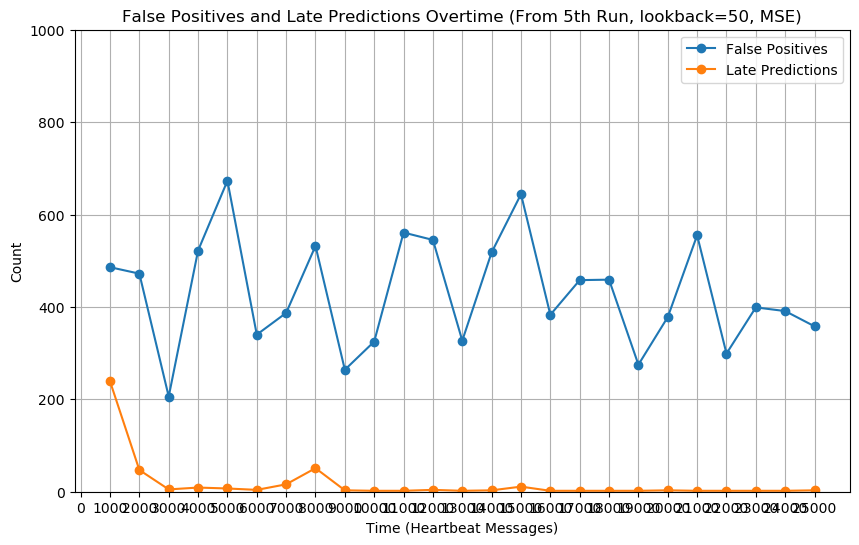

In [30]:
import matplotlib.pyplot as plt

# Function to process data starting from the 5th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 5:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 5th Run, lookback=50, MSE)')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


In [ ]:
import matplotlib.pyplot as plt

# Function to process data starting from the 5th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 6:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 5th Run, lookback=50, MSE)')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


chen fd analysis result

Processed Data: {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000], 'false_positives': [0, 0, 0, 0, 0, 0, 0]}


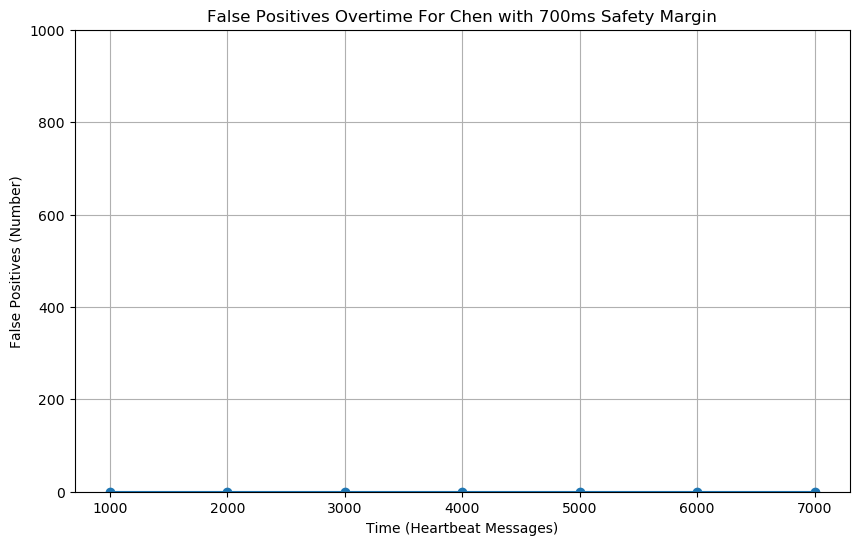

In [3]:
import matplotlib.pyplot as plt
# Function to process data between the first and second "*******************New Run*******************" markers
def process_data_between_markers(lines):
    data = {"time": [], "false_positives": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 2:
                start_processing = True
                continue
            if marker_count == 3:
                break
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    cnt = int(line.strip().split(": ")[1])
                    data["false_positives"].append(cnt)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass

    return data

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('False Positives (Number)')
    plt.title('False Positives Overtime For Chen with 700ms Safety Margin')
    plt.grid(True)
    
    # Set the y-axis limits to (0, 1000)
    plt.ylim(0, 1000)
    plt.show()

if __name__ == "__main__":
    file_path = "../../chen_eval/output/general_stats.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data = process_data_between_markers(lines)

    print("Processed Data:", data)
    plot_line_chart(data)


Processed Data: [{'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000], 'false_positives': [360, 294, 377, 404, 410, 456, 445, 408, 386, 394, 412, 330, 451, 441, 439, 429], 'parameters': 'n = 50, safety margin = 700ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000], 'false_positives': [0, 0, 0, 0, 0, 0, 0], 'parameters': 'n = 5, safety margin = 700ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000], 'false_positives': [18, 21, 22, 24, 35, 32, 25, 21, 19], 'parameters': 'n = 5, safety margin = 100ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000], 'false_positives': [924, 919, 959, 933, 953, 899], 'parameters': 'n = 20, safety margin = 100ms'}, {'time': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000], 'false_positives': [505, 513, 520, 556, 570, 518, 542, 516, 417, 247, 489, 559, 566, 504], 'parameters': 'n = 20, safety margin = 200ms'}, {'time': [1000, 2000, 30

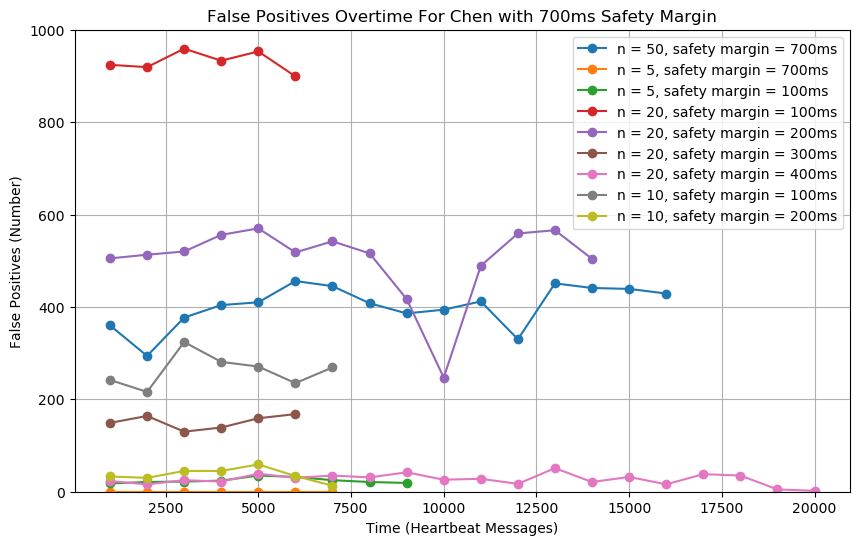

In [2]:
import matplotlib.pyplot as plt

# Function to process data between the "New Run" markers
def process_data_between_markers(lines):
    data_list = []
    interval = 1000  # X-axis interval for heartbeat messages

    current_data = {"time": [], "false_positives": []}

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            if current_data["time"] and current_data["false_positives"]:
                data_list.append(current_data)
                current_data = {"time": [], "false_positives": [], "parameters": ""}
            continue
        
        if line.strip().startswith("n = "):
            current_data["parameters"] = line.strip()
            

        if line.strip().startswith("false_positives: "):
            try:
                cnt = int(line.strip().split(": ")[1])
                current_data["false_positives"].append(cnt)
                current_data["time"].append(interval * len(current_data["false_positives"]))
            except (ValueError, IndexError):
                pass

    if current_data["time"] and current_data["false_positives"]:
        data_list.append(current_data)

    return data_list

# Read data from the file
def read_data_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

# Main function to plot the line chart
def plot_line_chart(data_list):
    plt.figure(figsize=(10, 6))

    for i, data in enumerate(data_list):
        plt.plot(data["time"], data["false_positives"], marker='o', label=data["parameters"])

    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('False Positives (Number)')
    plt.title('False Positives Overtime For Chen with 700ms Safety Margin')
    plt.grid(True)
    plt.legend()
    
    # Set the y-axis limits to (0, 1000)
    plt.ylim(0, 1000)
    plt.show()

if __name__ == "__main__":
    file_path = "../../chen_eval/output/general_stats.txt"  # Replace with the path to your text file
    lines = read_data_from_file(file_path)
    data_list = process_data_between_markers(lines)

    print("Processed Data:", data_list)
    plot_line_chart(data_list)


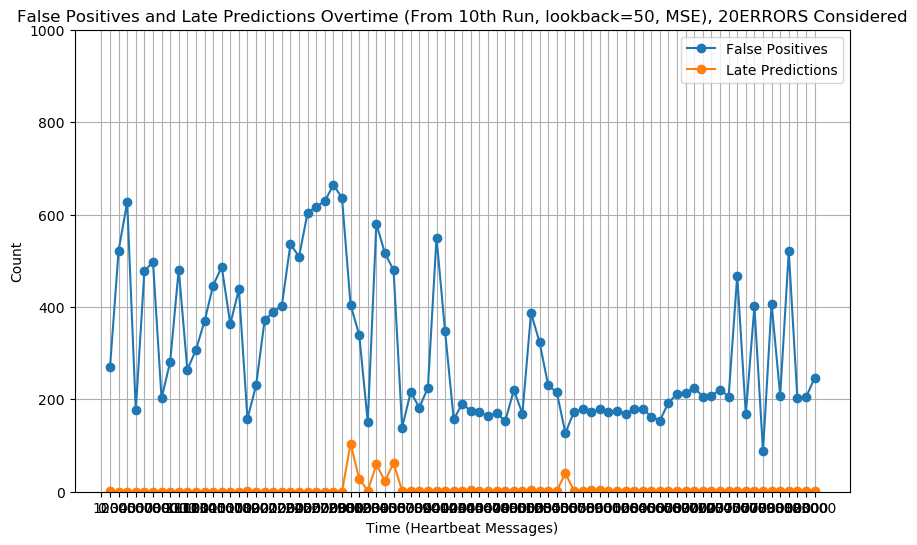

In [45]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 10:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 10th Run, lookback=50, MSE), 20ERRORS Considered')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


the lare_prediction count is inaccurate because I forget to add it correclty!

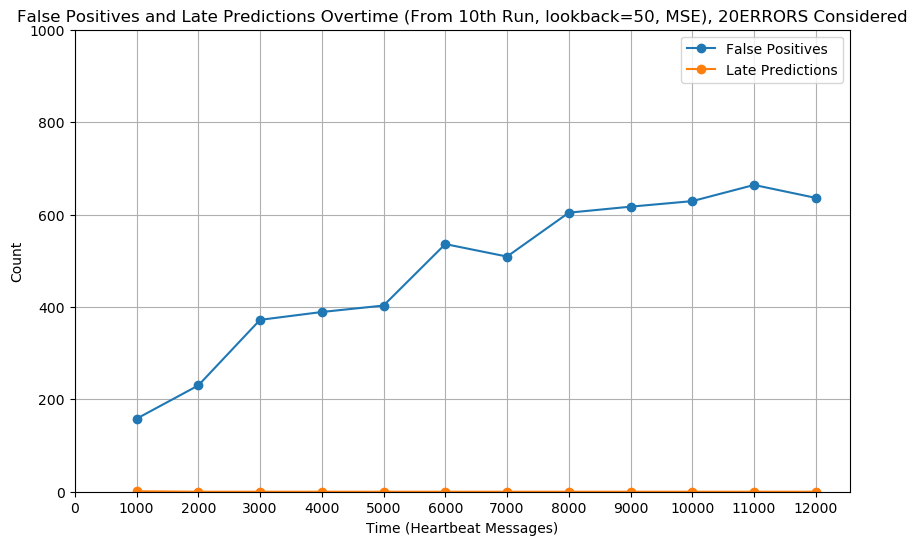

In [23]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 11:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 10th Run, lookback=50, MSE), 20ERRORS Considered, only update the model when it performs worse that the last N heartbeats, which means that the situation has changed, and we probably need a new model')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)


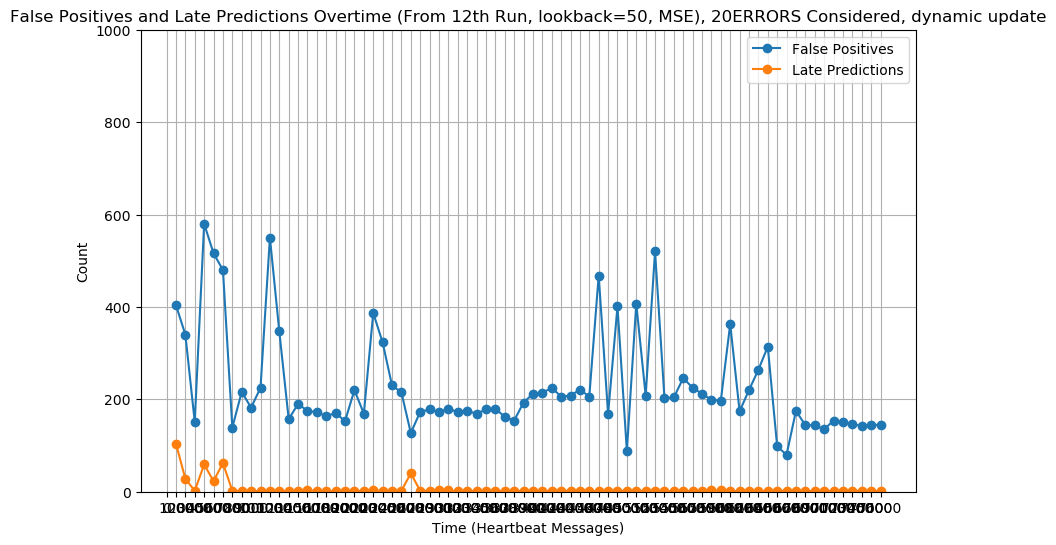

In [1]:
import matplotlib.pyplot as plt

# Function to process data starting from the 10th occurrence of "*******************New Run*******************"
def process_data_from_5th_run(lines):
    data = {"time": [], "false_positives": [], "late_predictions": []}
    marker_count = 0
    interval = 1000  # X-axis interval for heartbeat messages
    heartbeat_count = 0
    start_processing = False

    for line in lines:
        if line.strip() == "*******************New Run*******************":
            marker_count += 1
            if marker_count == 12:
                start_processing = True
                continue
        elif start_processing:
            if line.strip().startswith("false_positives: "):
                try:
                    false_positives = int(line.strip().split(": ")[1])
                    data["false_positives"].append(false_positives)
                    heartbeat_count += 1
                    data["time"].append(interval * heartbeat_count)
                except (ValueError, IndexError):
                    pass
            elif line.strip().startswith("late_predictions: "):
                try:
                    late_predictions = int(line.strip().split(": ")[1])
                    data["late_predictions"].append(late_predictions)
                except (ValueError, IndexError):
                    pass

    return data

# Main function to plot the line chart
def plot_line_chart(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data["time"], data["false_positives"], marker='o', label='False Positives')
    plt.plot(data["time"], data["late_predictions"], marker='o', label='Late Predictions')
    plt.xlabel('Time (Heartbeat Messages)')
    plt.ylabel('Count')
    plt.title('False Positives and Late Predictions Overtime (From 12th Run, lookback=50, MSE), 20ERRORS Considered, dynamic update')
    plt.legend()
    plt.grid(True)
    
    plt.ylim(0, 1000)  # Set the y-axis limits to (0, 1000)
    
    # Set the X-axis interval to 1000 heartbeat messages
    plt.xticks(range(0, max(data["time"]) + 1, 1000))
    
    plt.show()

if __name__ == "__main__":
    # Replace this with the path to your text file containing the data
    file_path = "general_stats.txt"
    
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = process_data_from_5th_run(lines)
    plot_line_chart(data)
